In [59]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
#read the dataset
data = pd.read_csv('C:/Users/LENOVO/Linear-Regression-Manual/Housing.csv')

In [63]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [67]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [69]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [71]:
#chane yes and no to 1 and 0
data.replace({'yes':1,'no':0},inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18772\1569900733.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'yes':1,'no':0},inplace = True)


In [73]:
#one - hot encoding
data = pd.get_dummies(data,columns=['furnishingstatus'],drop_first=True)

In [75]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


<Axes: ylabel='price'>

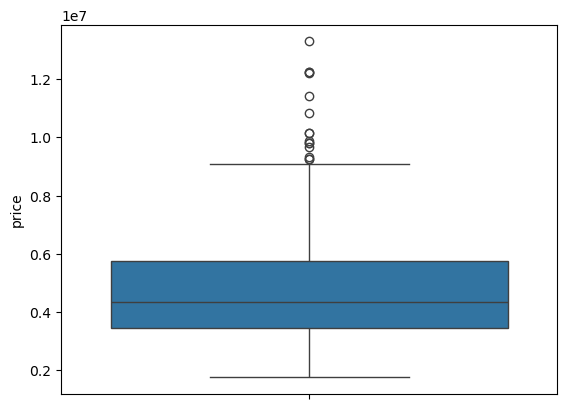

In [77]:
#check outliers
import seaborn as sns
sns.boxplot(data['price'])

In [79]:
#well here standard way of doing it using q1 , q1 ,iqr is commnted below and cause it was causing my r2 score to drop 
#  so i opted for this method removing data above 0.99 quantile
data = data[data['price'] < data['price'].quantile(0.99)]

#Q1 = data['price'].quantile(0.25)
#Q3 = data['price'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5*IQR
#upper_bound = Q3 + 1.5*IQR

#data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

<Axes: ylabel='price'>

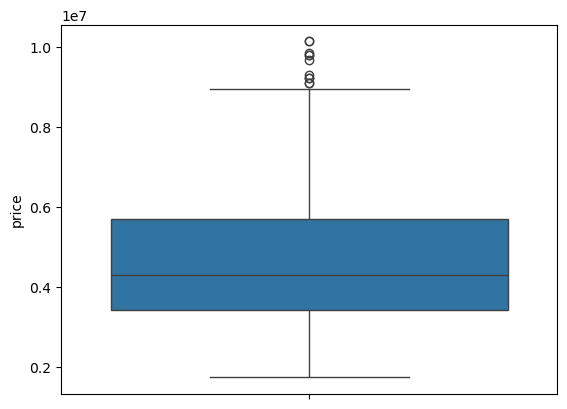

In [81]:
#check again
sns.boxplot(data['price'])

In [83]:
#separating X and y
X = data.drop('price' , axis = 1)
y = data['price']

In [85]:
#reshape y as column vector
y = y.values.reshape((-1,))

In [87]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2 ,random_state=42)

In [89]:
#manual implementation of cost function
def compute_cost(X,y,W,b , lambda_):
    m , n = X.shape
    total_cost = 0
    for i in range(m):
        f_wbi = np.dot(X[i], W)+b
        cost = (f_wbi - y[i])**2
        total_cost += cost
    total_cost *= (1/(2*m))
    reg = 0
    for i in range(n):
        reg += W[i]**2
    reg *= lambda_
    reg *= (1/(2*m))
    return (total_cost + reg).item()

In [91]:
# again manual function for computing gradient
def compute_gradient(X,y,W,b,lambda_):
    m , n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wbi = f_wbi = np.dot(X[i],W).item()+b
        err = (f_wbi - y[i])
        for j in range(n):
            dj_dw[j] += err*X[i,j] 
        dj_db += err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    for j in range(n):
        dj_dw_reg = (lambda_/m)*W[j]
        dj_dw[j] += dj_dw_reg
    return dj_dw,dj_db

In [93]:
def gradient_descent(X,y,w_in,b_in,compute_cost,compute_gradient,num_iter,alpha,lambda_):
    import copy
    w = copy.deepcopy(w_in)
    b = b_in
    j_history = []
    for i in range(num_iter):
        dj_dw,dj_db = compute_gradient(X,y,w,b,lambda_)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        cost = compute_cost(X,y,w,b,lambda_)
        j_history.append(cost)
    return w , b , j_history

In [95]:
X_train.shape

(431, 13)

In [97]:
#now here a important note don't mess up shape of w it should be row vector
m , n =X_train.shape
w_in = np.zeros((n,))
b_in = 0.0
alpha = 0.01
iterations = 1000
lambda_ = 2

In [99]:
#normalize the data using standard scalar fron sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
#train the model
w_final , b_final ,j_history = gradient_descent(X_train_scaled,y_train,w_in,b_in,compute_cost,compute_gradient,iterations,alpha,lambda_)

In [103]:
#predict
def predict(X,w,b):
    return np.dot(X,w) + b
y_test_preds = predict(X_test_scaled , w_final,b_final)

In [105]:
#evluating manual implementation
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test ,y_test_preds)
print("Test MSE:" , mse)
rmse = np.sqrt(mse)
print("Test RMSE:" , rmse)
r2= r2_score(y_test ,y_test_preds)
print("Test R2 Score:", r2)
print("RMSE as % of average price:", rmse / y_test.mean()*100)
print("Weights:",w_final)
print("bias:", b_final)

Test MSE: 1061285782422.5562
Test RMSE: 1030187.2559989063
Test R2 Score: 0.7232456979095772
RMSE as % of average price: 21.0917456195535
Weights: [ 480421.70000136   58201.58876436  443126.4954764   363587.95707575
  154344.96472414  163311.07129271  115261.46063829  153514.89989044
  370530.20511702  143230.71518435  246336.24559829  -42865.06927325
 -170150.40004284]
bias: 4635731.276371116


In [107]:
#now lets try sklearn to compare
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [109]:
#evaluating sklearn implementation
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test ,y_pred)
print("Test MSE:" , mse)
rmse = np.sqrt(mse)
print("Test RMSE:" , rmse)
r2= r2_score(y_test ,y_pred)
print("Test R2 Score:", r2)
print("RMSE as % of average price:", rmse / y_test.mean()*100)
print("Weights:",model.coef_)
print("bias:", model.intercept_)

Test MSE: 1060142746340.1469
Test RMSE: 1029632.3355160068
Test R2 Score: 0.7235437704537409
RMSE as % of average price: 21.080384343633767
Weights: [ 483312.42432771   55593.5204629   444929.62487217  366214.59939637
  153315.85132084  162293.83026755  116392.66165025  154343.99972705
  370803.18083242  142390.97038397  246838.5982633   -45353.62388861
 -173028.28912054]
bias: 4635931.415313225


In [111]:
#well manual imple. is closely following the sklearn one

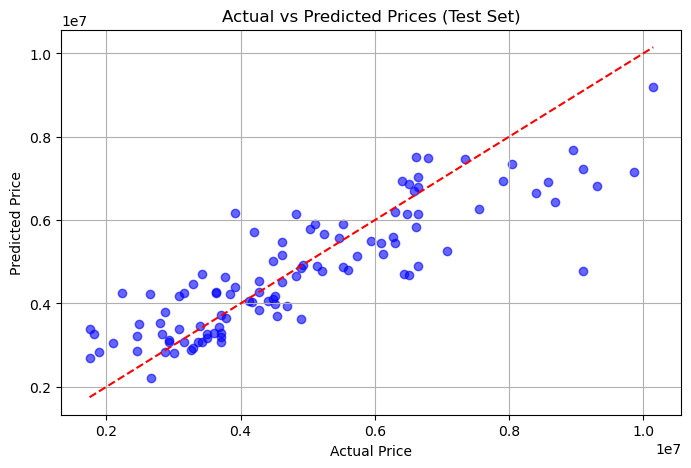

In [113]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_preds, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Test Set)")
plt.grid(True)
plt.show()

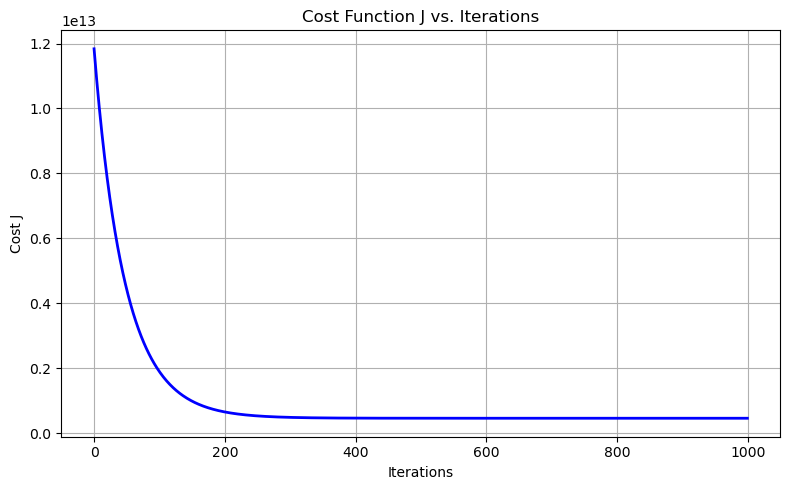

In [115]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(j_history)), j_history, color='blue', linewidth=2)
plt.title('Cost Function J vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.grid(True)
plt.tight_layout()
plt.show()